<a href="https://colab.research.google.com/github/PlacementGuide1/PythonCourse/blob/main/Lecture10_Regularexpressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. https://learn.microsoft.com/en-us/dotnet/standard/base-types/regular-expression-language-quick-reference

2. https://towardsdatascience.com/regular-expressions-clearly-explained-with-examples-822d76b037b4

>[What is a regular expresion](#scrollTo=Njjv16Mup34a)

>[Basic regex characters you need to know](#scrollTo=ejplez5qqUrx)

>>[Characters](#scrollTo=o6G0wlEEq2fg)

>>[Groupings](#scrollTo=D2sPCV5nq9n5)

>>[Quantifiers](#scrollTo=W2qwt99GrBUX)

>[Regex examples](#scrollTo=wdLxP9hOr_Ii)

>>[Phone number](#scrollTo=p6PP_NywsMmt)

>>[Date](#scrollTo=SpxduJFtu9Gj)

>>[Names](#scrollTo=pxgo-6ruvdso)

>>[URLs](#scrollTo=CHTzN0BlyH4K)

>>[Email address](#scrollTo=x77AwulEzWHR)

>[Character matching in regular expressions](#scrollTo=s5fuQMMe5s-L)

>[Extracting data using regular expressions](#scrollTo=XfQlJU5X6nFJ)

>[Combining searching and extracting](#scrollTo=1k1rEL_48C2J)

>[Escape character](#scrollTo=ZJaCjCwU9kKU)



#What is a regular expresion

Regular expression is not a library nor is it a programming language. Instead, regular expression is a sequence of characters that specifies a search pattern in any given text (string).

A text can consist of pretty much anything from letters to numbers, space characters to special characters. As long as the string follows some sort of pattern, regex is robust enough to be able to capture this pattern and return a specific part of the string.

Regular expressions are almost their own little programming language for searching
and parsing strings. As a matter of fact, entire books have been written on the
topic of regular expressions. In this chapter, we will only cover the basics of regular
expressions.


The regular expression module re must be imported into your program before you
can use it. The simplest use of the regular expression module is the search()
function. The following program demonstrates a trivial use of the search function.

In [ ]:
# Search for lines that contain 'From'
import re
hand = open('/content/sample_data/mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('From:', line):
        print(line)

#Basic regex characters you need to know

Now, before we get into the nitty-gritty, I think it is crucial that we first go over some of the basics of regular expressions.

The examples later on in this article will be building off some of the main concepts illustrated here, namely: characters, groupings, and quantifiers.


##Characters

* Escape character: \

* Any character: .

* Digit: \d

* Not a digit: \D

* Word character: \w

* Not a word character: \W

* Whitespace: \s

* Not whitespace: \S

* Word boundary: \b

* Not a word boundary: \B

* Beginning of a string: ^

* End of a string: $

##Groupings

* Matches characters in brackets: [ ]

* Matches characters not in brackets: [^ ]

* Either or: |

* Capturing group: ( )


##Quantifiers

* 0 or more: *

* 1 or more: +

* 0 or 1: ?

* An exact number of characters: { }

* Range of number of characters: {Minimum, Maximum}






#Regex examples

In this section, we will be focusing on 6 different examples that will hopefully reinforce your understanding of regular expressions. Effectively, we will be looking at:

* 2 examples with numbers (phone number and date)
* 2 examples with letters (names and URLs)
* 2 examples with both numbers and letters (Email address and address)

## Phone number
Suppose we have a data frame called phone, containing a list of phone numbers as follows:

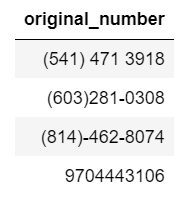

We would like to break up these phone numbers into 3 individual components: area code (first 3 digits), exchange (next 3 digits), and line number (last 4 digits).

As we can see, the number patterns here are not always consistent i.e. they have inconsistent parentheses, hyphens, and spaces. However, with the help of regular expressions, we can easily capture the number groups.

First, we will need to define a regex pattern.

In [ ]:
import re

phone_pattern = ".?(\\d{3}).*(\\d{3}).*(\\d{4})"
x = "8208239980"

print(re.fullmatch(phone_pattern, x))

None


How exactly do we interpret this? Well, let’s take this step by step, going from left to right:

* .? 0 or 1 character to account for the optional open parenthesis
(\\d{3}) 3 digit characters (first capture group i.e. first 3 digits)
* .* 0 or more characters to account for the optional closing parenthesis, hyphen, and space characters
(\\d{3}) 3 digit characters (second capture group i.e. next 3 digits)
* .* 0 or more characters to account for the optional hyphen and space characters
(\\d{4}) 4 digit characters (third capture group i.e. last 4 digits)

##Date

Suppose we have another data frame called date, which consists of dates with inconsistent delimiters and we want to extract the days, months, and years.

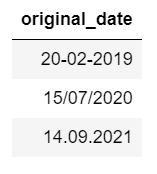

Using a very similar approach to the one we just saw with phone numbers, we need to first define a regex pattern, then match the pattern to the original date column, and finally create a new column for each capture group.

First, define the regex pattern for dates.

In [ ]:
date_pattern = "(\\d{2}).(\\d{2}).(\\d{4})"

Here’s the code explanation:

* (\\d{2}) 2 digit characters (first capture group i.e. day)
. a single character to account for all special characters
* (\\d{2}) 2 digit characters (second capture group i.e. month)
. a single character to account for all special characters
* (\\d{4}) 4 digit characters (third capture group i.e. year)
Now, we can match the pattern and create individual columns for day, month and year.

##Names

So far, we have explored two examples of strings that contain only digits and special characters. Let’s now learn how to capture words and letters.

Here I have a data frame called names, with people’s family names, titles, and given names.

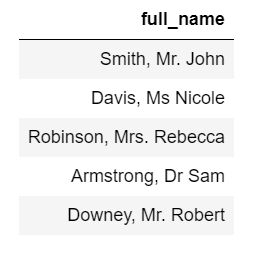

Let’s break them up so that they each have their own individual columns.

In [ ]:
name_pattern = "(\\w+),\\s(Mr|Ms|Mrs|Dr).?\\s(\\w+)"

* (\\w+) 1 or more word characters (first capture group i.e. family name)
* , comma character
* \\s a single whitespace character
* (Mr|Ms|Mrs|Dr) Mr, Ms, Mrs or Dr (second capture group i.e. title)
* .? 0 or 1 full stop character after title
* \\s a single whitespace character
* (\\w+) 1 or more word characters (third capture group i.e. given name)

##URLs

Let’s look at another example of strings with words and letters.

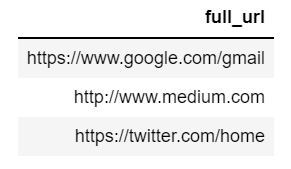



In [ ]:
url_pattern = "(https?)://(www)?.?(\\w+).(\\w+)/?(\\w+)?"

The interpretation:

* (https?) http or https (first capture group i.e. schema)
* :// specific special character string
* (www)? optional www (second capture group i.e. subdomain)
* .? 0 or 1 full stop character
* (\\w+) 1 or more word characters (third capture group i.e. second-level domain)
* . a single full stop character
* (\\w+)1 or more word characters (fourth capture group i.e. top-level domain)
* /? 0 or 1 backslash character
* (\\w+)? optional 1 or more word characters (fifth capture group i.e. subdirectory)

##Email address

Using the knowledge that we have gained so far about regular expressions, let us now look at two final string examples that contain both letters and numbers.

Suppose we have a list of emails in a data frame called email:

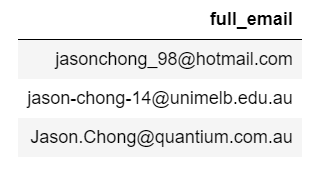

Now, generate a regex pattern to match the username, domain name, and domain.

In [ ]:
email_pattern = "([a-zA-Z0-9\\_\\-\\.]+)@([a-zA-Z]+).(.+)"

Let’s have a closer look at the regex and decipher its meaning.

* ([a-zA-Z0-9\\_\\-\\.]+) 1 or more lowercase letters, uppercase letters, digits, and special characters including underscore, hyphen, and full stop (first capture group i.e. username)
* @ at symbol
* ([a-zA-Z]+) 1 or more lowercase and uppercase letters (second capture group i.e. domain name)
* . a single full stop character
* (.+) 1 or more characters (third capture group i.e. domain)

##Address
I have made up a data frame called address, with hypothetical addresses. The goal is to retrieve the house number, street name, suburb, state, and postcode.

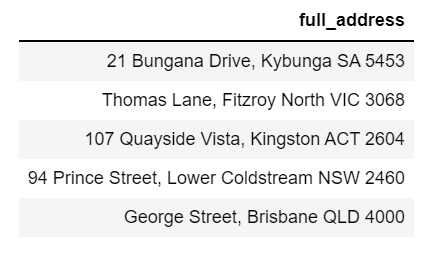

In [ ]:
address_pattern = "(\\d*)\\s?(.+),\\s(.+)\\s([A-Z]{2,3})\\s(\\d{4})"

And the code explanation:

* (\\d*) 0 or more digit characters because some addresses do not have house numbers (first capture group i.e. house number)
* \\s? 0 or 1 whitespace character
* (.+) 1 or more characters (second capture group i.e. street name)
* , comma
* \\s a single whitespace character
* (.+) 1 or more characters (third capture group i.e. suburb)
* \\s a single whitespace character
* ([A-Z]{2,3}) 2 or 3 uppercase letters (fourth capture group i.e. state)
* \\s a single whitespace character
* (\\d{4}) 4 digit characters (fifth capture group i.e. postcode)

# Character matching in regular expressions


There are a number of other special characters that let us build even more powerful
regular expressions. The most commonly used special character is the period or
full stop, which matches any character.


In the following example, the regular expression F..m: would match any of the
strings “From:”, “Fxxm:”, “F12m:”, or “F!@m:” since the period characters in the
regular expression match any character.

In [ ]:
import re
hand = open('/content/sample_data/mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('^F..m:', line):
        print(line)


#Extracting data using regular expressions

If we want to extract data from a string in Python we can use the findall()
method to extract all of the substrings which match a regular expression.

 Let’s use the example of wanting to extract anything that looks like an email address from any line regardless of format. For example, we want to pull the email addresses from each of the following lines:

We don’t want to write code for each of the types of lines, splitting and slicing differently for each line. This following program uses findall() to find the lines with email addresses in them and extract one or more addresses from each of those lines




In [ ]:
import re
s = 'A message from csev@umich.edu to cwen@iupui.edu about meeting @2PM'
lst = re.findall('\S+@\S+', s)
print(lst)


['csev@umich.edu', 'cwen@iupui.edu']


The findall() method searches the string in the second argument and returns a
list of all of the strings that look like email addresses. We are using a two-character
sequence that matches a non-whitespace character (\S).
The output of the program would be:

['csev@umich.edu', 'cwen@iupui.edu']


Translating the regular expression, we are looking for substrings that have at least
one non-whitespace character, followed by an at-sign, followed by at least one more
non-whitespace character. The \S+ matches as many non-whitespace characters
as possible.


The regular expression would match twice (csev@umich.edu and cwen@iupui.edu),
but it would not match the string “@2PM” because there are no non-blank characters before the at-sign. We can use this regular expression in a program to read
all the lines in a file and print out anything that looks like an email address as
follows:

In [ ]:
import re
hand = open('/content/sample_data/mbox-short.txt')
for line in hand:
    line = line.rstrip()
    x = re.findall('\S+@\S+', line)
    if len(x) > 0:
        print(x)


This is getting a little complicated and you can begin to see why regular expressions
are their own little language unto themselves. Translating this regular expression,
we are looking for substrings that start with a single lowercase letter, uppercase
letter, or number “[a-zA-Z0-9]”, followed by zero or more non-blank characters
(\S*), followed by an at-sign, followed by zero or more non-blank characters (\S*),
followed by an uppercase or lowercase letter. Note that we switched from + to *
to indicate zero or more non-blank characters since [a-zA-Z0-9] is already one
non-blank character. Remember that the * or + applies to the single character
immediately to the left of the plus or asterisk.


If we use this expression in our program, our data is much cleaner

In [ ]:
import re
hand = open('/content/sample_data/mbox-short.txtmbox-short.txt')
for line in hand:
    line = line.rstrip()
    x = re.findall('[a-zA-Z0-9]\S*@\S*[a-zA-Z]', line)
    if len(x) > 0:
        print(x)

#Combining searching and extracting

If we want to find numbers on lines that start with the string “X-” such as:

X-DSPAM-Confidence: 0.8475
X-DSPAM-Probability: 0.0000

we don’t just want any floating-point numbers from any lines. We only want to
extract numbers from lines that have the above syntax.
We can construct the following regular expression to select the lines:

^X-.*: [0-9.]+

Translating this, we are saying, we want lines that start with X-, followed by zero
or more characters (.*), followed by a colon (:) and then a space. After the
space we are looking for one or more characters that are either a digit (0-9) or
a period [0-9.]+. Note that inside the square brackets, the period matches an
actual period (i.e., it is not a wildcard between the square brackets).
This is a very tight expression that will pretty much match only the lines we are
interested in as follows:

In [ ]:
import re
hand = open('/content/sample_data/mbox-short.txt')
for line in hand:
    line = line.rstrip()
    if re.search('^X\S*: [0-9.]+', line):
        print(line)


When we run the program, we see the data nicely filtered to show only the lines
we are looking for.

X-DSPAM-Confidence: 0.8475
X-DSPAM-Probability: 0.0000
X-DSPAM-Confidence: 0.6178
X-DSPAM-Probability: 0.0000
...
But now we have to solve the problem of extracting the numbers. While it would
be simple enough to use split, we can use another feature of regular expressions
to both search and parse the line at the same time.

Parentheses are another special character in regular expressions. When you add
parentheses to a regular expression, they are ignored when matching the string.
But when you are using findall(), parentheses indicate that while you want the
whole expression to match, you only are interested in extracting a portion of the
substring that matches the regular expression.


So we make the following change to our program:

In [ ]:
import re
hand = open('/content/sample_data/mbox-short.txt')
for line in hand:
    line = line.rstrip()
    x= re.findall('^X\S*: ([0-9.]+)', line)
    if len(x) > 0:
        print(x)


Details: http://source.sakaiproject.org/viewsvn/?view=rev&rev=39772


If we wanted to extract all of the revision numbers (the integer number at the end
of these lines) using the same technique as above, we could write the following
program:

In [ ]:
import re
hand = open('/content/sample_data/mbox-short.txt')
for line in hand:
    line = line.rstrip()
    x = re.findall('^Details:.*rev=([0-9]+)', line)
    if len(x) > 0:
        print(x)


The translation of this regular expression is that we are looking for lines that start
with From (note the space), followed by any number of characters (.*), followed by
a space, followed by two digits [0-9][0-9], followed by a colon character. This is
the definition of the kinds of lines we are looking for.


In order to pull out only the hour using findall(), we add parentheses around
the two digits as follows:

In [ ]:
import re
hand = open('/content/sample_data/mbox-short.txt')
for line in hand:
    line = line.rstrip()
    x = re.findall('^From .* ([0-9][0-9]):', line)
    if len(x) > 0: 
       print(x)


#Escape character

Since we use special characters in regular expressions to match the beginning or
end of a line or specify wild cards, we need a way to indicate that these characters
are “normal” and we want to match the actual character such as a dollar sign or
caret.


We can indicate that we want to simply match a character by prefixing that character with a backslash. For example, we can find money amounts with the following
regular expression

In [ ]:
import re
x = 'We just received $10.00 for cookies.'
y = re.findall('\$[0-9.]+',x)
